## Text Classification using K Nearest Neighbors

### Load Data from `sklearn`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics
import sklearn.neighbors

In [2]:
print('Loading 20 newsgroups dataset for categories:...')
data_train = fetch_20newsgroups(subset = 'train', shuffle = True, random_state = 42)
data_test  = fetch_20newsgroups(subset = 'test', shuffle = True, random_state = 42)
print('Data loaded')

Loading 20 newsgroups dataset for categories:...
Data loaded


### Data Inspection

In [3]:
type(data_train)

sklearn.datasets.base.Bunch

In [4]:
data_train.description

'the 20 newsgroups by date dataset'

In [5]:
# data type 
type(data_train.data), type(data_train.target)

(list, numpy.ndarray)

In [6]:
# check the size of train and test data
len(data_train.data), len(data_test.data)

(11314, 7532)

In [7]:
# response - categorical variable, should have 20 groups
set(data_train.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [8]:
print("Document:\n\n {}\n Label: {}".format(data_train.data[0], data_train.target[0]))

Document:

 From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





 Label: 7


In [9]:
print("Document:\n\n {}\n Label: {}".format(data_train.data[1], data_train.target[1]))

Document:

 From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>

 Label: 4


### Feature Extraction

In [10]:
# Create tf-idf vectors for the input
# see more about tf-idf: https://en.wikipedia.org/wiki/Tf%E2%80%93idf
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.9, stop_words = 'english')
X_train = vectorizer.fit_transform(data_train.data)
X_test = vectorizer.transform(data_test.data)
y_train = data_train.target
y_test = data_test.target

In [11]:
X_train.shape, X_test.shape

((11314, 129793), (7532, 129793))

In [12]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [13]:
X_train[:5, :10].toarray()

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [14]:
# Train a K-Neighbors Classifier on the data
n_neighbors = 2
weights = 'uniform'
clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights = weights)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [15]:
# Make predictions on the test data using the trained classifier
y_predicted = clf.predict(X_test)
print('Classification report:\n{}'.format(sklearn.metrics.classification_report(y_test, y_predicted, 
                                                                                target_names = data_test.target_names)))

Classification report:
                          precision    recall  f1-score   support

             alt.atheism       0.66      0.83      0.73       319
           comp.graphics       0.42      0.68      0.52       389
 comp.os.ms-windows.misc       0.44      0.60      0.51       394
comp.sys.ibm.pc.hardware       0.46      0.61      0.53       392
   comp.sys.mac.hardware       0.49      0.59      0.54       385
          comp.windows.x       0.60      0.56      0.58       395
            misc.forsale       0.51      0.51      0.51       390
               rec.autos       0.72      0.68      0.70       396
         rec.motorcycles       0.83      0.83      0.83       398
      rec.sport.baseball       0.72      0.76      0.74       397
        rec.sport.hockey       0.82      0.79      0.81       399
               sci.crypt       0.79      0.81      0.80       396
         sci.electronics       0.69      0.50      0.58       393
                 sci.med       0.77      0.51      0

In [16]:
print('F1 score for K = 2: {}'.format(sklearn.metrics.f1_score(y_test, y_predicted, average = 'weighted')))

F1 score for K = 2: 0.669868849498


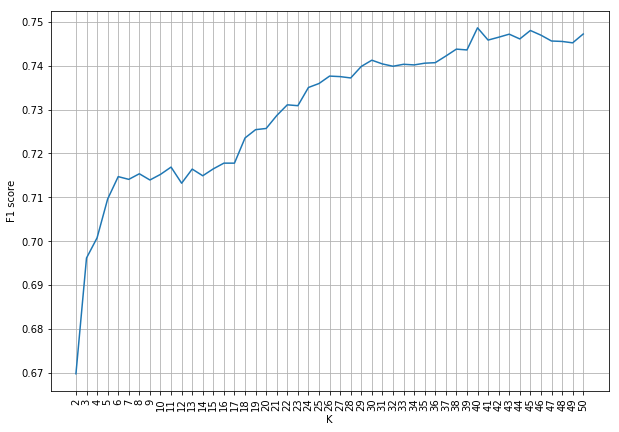

In [17]:
K = np.arange(2, 51)
f1_score = np.zeros(len(K))
for k in K:
    clf = sklearn.neighbors.KNeighborsClassifier(k, weights = 'uniform')
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    f1_score[k - 2] = sklearn.metrics.f1_score(y_test, y_predicted, average = 'weighted')
    
# plot K against F1 score
mpl.rcParams['figure.figsize'] = (10, 7)
plt.plot(K, f1_score)
plt.xlabel('K')
plt.ylabel('F1 score')
plt.xticks(np.arange(2, 51), rotation = 'vertical')
plt.grid(True)
plt.show()